In [1]:
# Name : Neeraja Prabhudesai
# Enrollment no.- 0006

In [2]:
import numpy as np

In [3]:
def sigmoid (z):
    value = 1 / (1+np.exp(-z))
    return value

In [4]:
sigmoid(17637)

1.0

In [5]:
sigmoid(8.90)

0.9998636296729204

In [6]:
def softmax(z):
    val = np.exp(z) /np.sum(np.exp(z))
    return val

In [7]:
# softmax function
# in sigmoid probability varie from 0 to 1 - wherever there is highest probability- there you can get your final result
softmax([3.4, 7.1, 0.45, 2.67, 7.3, 6.5, 5.2])

array([0.008359  , 0.33809883, 0.00043751, 0.00402828, 0.41295484,
       0.18555257, 0.05056898])

In [8]:
sum([0.02381999, 0.963545422, 0.00124673, 0.01147907])

1.000091212

In [13]:
pip install tensorflow keras -U

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Dataset
#Name - SMSspamCollection
#Location - mitu dataset

In [10]:
#import the libraries

In [11]:
import pandas as pd
import seaborn as sns

In [12]:
#read the data
#this file contains tab or seperated by tab and column names are not present inside it hence column names are given

In [13]:
df = pd.read_csv('SMSSpamCollection (1)', sep='\t', names= ['label', 'text'])

In [14]:
df
#label - o/p, text - i/p

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
#seperate the input and output data

In [16]:
#input data 
x = df['text']
y = df['label']

<Axes: xlabel='label', ylabel='count'>

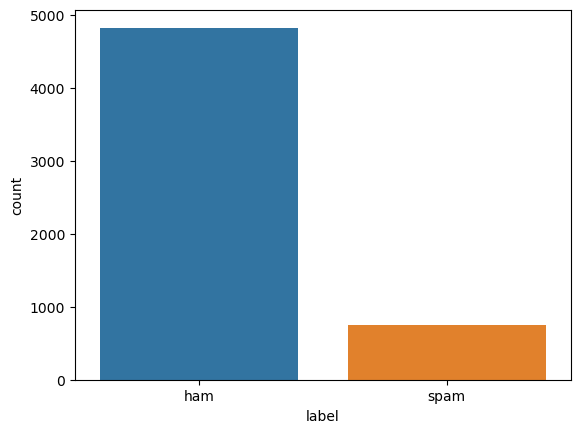

In [17]:
sns.countplot(x=y)
# this is imbalance dataset

In [18]:
# imbalanced learn is library which is used for balancing the data

In [30]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
#Data preperation

In [19]:
#Data cleaning

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [21]:
swords = stopwords.words('english')

In [22]:
#define a function for text cleaning
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    return tokens3

In [23]:
# to test the function
new_sent = 'It was the expected result. They told the same on fields.'

In [24]:
clean_text(new_sent)

['expected', 'result', 'told', 'fields']

In [25]:
# tf idf vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [28]:
# perfornn the operation
x_new = tfidf.fit_transform(x)

In [29]:
x_new.shape

(5572, 7217)

In [30]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [31]:
#Encoding the output variable

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
#create the object
le = LabelEncoder()

In [34]:
#apply the encoding
y_new = le.fit_transform(y)

In [35]:
y_new
#0- ham, 1- spam

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [37]:
le.inverse_transform([0])

array(['ham'], dtype=object)

In [38]:
le.inverse_transform([1])

array(['spam'], dtype=object)

In [39]:
#Cross validation

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, random_state=0) 

In [42]:
x_train.shape

(4179, 7217)

In [43]:
x_test.shape

(1393, 7217)

In [44]:
# Define the neural network model

In [45]:
#define the model - sequential class and dense class
#Keras library - to define the neural network
#in front layer , no. of neurons must be present as same as the no. of features

In [46]:
from keras.models import Sequential
from keras.layers import Dense

In [47]:
#create the object of NN modle
model = Sequential()

# create first or input layer
layer1 = Dense(64, input_shape=(7217,), activation = 'relu')
model.add(layer1)

# create hidden layer
layer2 = Dense(128, activation='relu')
model.add(layer2)

# create output layer
layer3 = Dense(1, activation = 'sigmoid')
model.add(layer3)

#multiclass: activation-softmax, number of neurons = no. of classes


C:\Users\unmes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         461,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 470,401 (1.79 MB)

 Trainable params: 470,401 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# visualise the model

In [50]:
from keras.utils import plot_model

In [51]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install graphviz


   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 585.5 kB/s eta 0:00:00


In [52]:
plot_model(model)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [7]:
plot_model(model, show_dtype=True, show_layer_activations=True, show_layer_names=True, show_shapes=True, show_trainable=True)

NameError: name 'model' is not defined

In [53]:
#compile the model

In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# multi-class: loss='categorical_crossentropy'

In [55]:
#train the model

In [57]:
type(x_train)

scipy.sparse._csr.csr_matrix

In [58]:
model.fit(x_train.toarray(), y_train, epochs=10, batch_size=10)

Epoch 1/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8926 - loss: 0.3310
Epoch 2/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9923 - loss: 0.0240
Epoch 3/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9968 - loss: 0.0091
Epoch 4/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 0.0015
Epoch 5/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 0.0022
Epoch 6/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9998 - loss: 0.0015
Epoch 7/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 2.7470e-04
Epoch 8/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9994 - loss: 0.0027
Epoch 9/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9999 - loss: 6.0265e-04
Epoch 10/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9998 - loss: 9.5219e-04


In [59]:
#Evaluate the model

In [61]:
model.evaluate(x_test.toarray(), y_test, batch_size=1)

1393/1393 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.9844 - loss: 0.0803


[0.11589127033948898, 0.9777458906173706]

In [62]:
#predictiom on unseen new data

In [63]:
#dataset: sample.csv
#location: mitu dataset

In [69]:
f = open('sample_1.csv')

In [70]:
new_data = f.readlines()

In [71]:
new_data

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a Â£1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [72]:
tfidf.transform(new_data)

<3x7217 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [73]:
tfidf.transform(new_data).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
model.predict(tfidf.transform(new_data).toarray())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[1.9683680e-10],
       [9.9999422e-01],
       [1.2350453e-04]], dtype=float32)

In [75]:
pred= model.predict(tfidf.transform(new_data).toarray())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
#probabilities of the result are:

In [76]:
pred[0]

array([1.968368e-10], dtype=float32)

In [77]:
pred[1]

array([0.9999942], dtype=float32)

In [78]:
pred[2]

array([0.0001235], dtype=float32)

In [79]:
if pred[0] > 0.5:
    print(le.inverse_transform([1]))
else:
    print(le.inverse_transform([0]))

['ham']


In [81]:
if pred[1] > 0.5:
    print(le.inverse_transform([1]))
else:
    print(le.inverse_transform([0]))

['spam']
